# Практична робота №7 
## Завдання 1 Авдєєва Серафима ФІТ 4-4

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
data = pd.read_csv("E:/University/матеріали лекцій/МН матеріали/МН лаби/МН лаб 7/shopping_trends.csv", encoding='unicode_escape')
print(data.head(5))

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [48]:
# Перевірка розміру таблиці, наявності пропусків та типів стовпців
print("Розмір таблиці:", data.shape)
print("Пропуски:\n", data.isnull().sum())
print("Типи стовпців:\n", data.dtypes)

Розмір таблиці: (3900, 19)
Пропуски:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Типи стовпців:
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Rev

In [49]:
# Вибір числових стовпців
selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
data_numeric = data[selected_columns]

# Перейменування стовпців
data_numeric.columns = ["age", "purchase_amount", "review_rating", "previous_purchases"]

# Масштабування даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

print("-----NUMERIC DATA-----\n", data_numeric, "\n")
print("-----SCALED DATA-----\n", data_scaled)

-----NUMERIC DATA-----
       age  purchase_amount  review_rating  previous_purchases
0      55               53            3.1                  14
1      19               64            3.1                   2
2      50               73            3.1                  23
3      21               90            3.5                  49
4      45               49            2.7                  31
...   ...              ...            ...                 ...
3895   40               28            4.2                  32
3896   52               49            4.5                  41
3897   46               33            2.9                  24
3898   44               77            3.8                  24
3899   52               81            3.1                  33

[3900 rows x 4 columns] 

-----SCALED DATA-----
 [[ 0.71891344 -0.28562864 -0.90758357 -0.78583067]
 [-1.64862924  0.17885219 -0.90758357 -1.61655226]
 [ 0.39008807  0.55888195 -0.90758357 -0.16278948]
 ...
 [ 0.12702777 -1.1301392

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

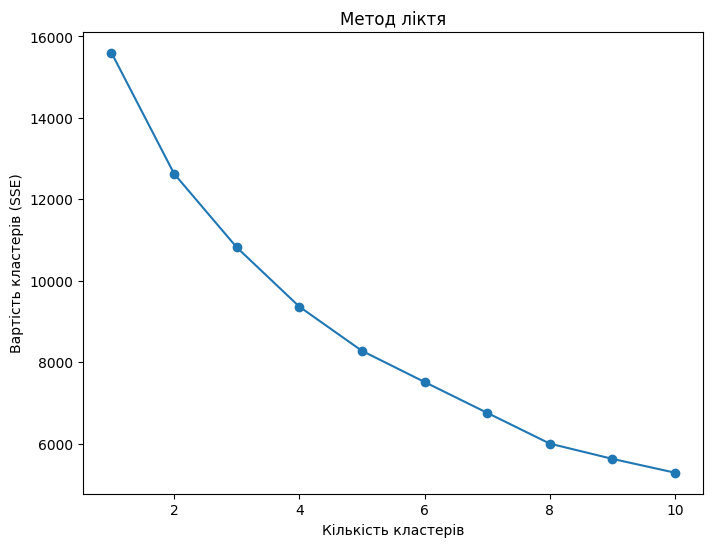

In [50]:
# Пошук оптимальної кількості кластерів
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Вартість кластерів (SSE)')
plt.show()

## Різке зменшення вартості кластерів спостерігається у точці k=2, отже, оптимальною кількістю кластерів є 2.

In [51]:
#3 Кластеризація за допомогою K-means
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data["cluster"] = kmeans.fit_predict(data_scaled)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


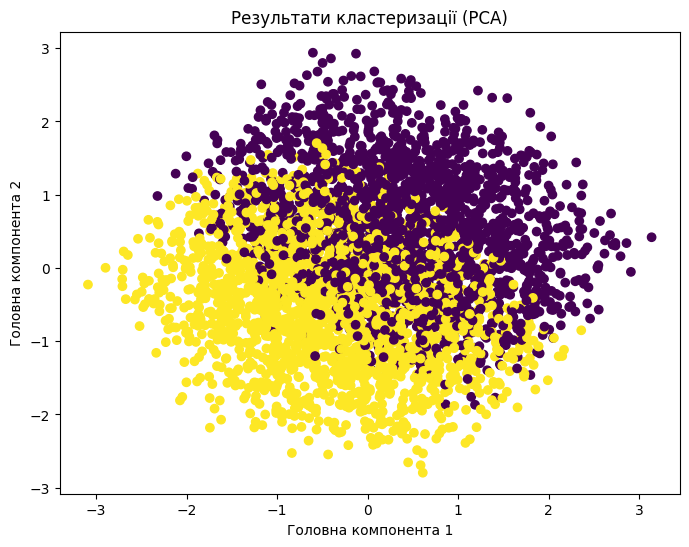

In [53]:
# Візуалізація результатів
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data["cluster"], cmap='viridis')
plt.title('Результати кластеризації (PCA)')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.show()

# Висновки

In [54]:
# У цій роботі ми провели аналіз та кластеризацію даних з набору "Customer Shopping Trends Dataset",
# який був завантажений з Kaggle. Основні кроки включали в себе:

# 1. Підготовку даних:
# Ми вибрали числові стовпці, які відповідали нашим вимогам: "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases".
# Створили новий DataFrame, перейменувавши стовпці та виконавши масштабування для забезпечення однакового масштабу числових ознак.

# 2. Визначення кількості кластерів:
# Ми використали метод ліктя для визначення оптимальної кількості кластерів.
# Побудували графік вартості кластерів (SSE) відносно кількості кластерів і обрали
# оптимальну кількість кластерів (k=2), де спостерігається різке зменшення вартості.

# 3. Кластеризація за допомогою K-means:
# Ми використали обрану оптимальну кількість кластерів і виконали кластеризацію даних за допомогою алгоритму K-means.
# Кожному об'єкту був призначений ідентифікатор кластера.

# 4. Візуалізація результатів за допомогою PCA:
# Ми використали метод головних компонентів (PCA) для зменшення розмірності даних до двох ознак.
# Побудували графік, що відображає результати кластеризації, де кожен кластер позначено різними кольорами.
# Ця робота дозволила краще зрозуміти структуру та закономірності внутрішніх груп споживачів 
# на основі їхніх характеристик, таких як вік, сума покупок, рейтинг відгуків і попередні покупки. 